In [2]:
# import libraries
import os
from pathlib import Path
import pandas as pd 
import seaborn as sns
import urllib
import json
import zipfile
from zipfile import ZipFile
from openpyxl import Workbook
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data'
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith('.csv') or item.endswith('.txt'):
        os.remove(os.path.join(dir_name, item))

In [4]:
# assign path to data folder 
data_path = r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data'

# file name to download
file = 'OpenDataDC_Taxi_2019.zip'

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# opening ZIP file in read mode
with zipfile.ZipFile(fullfilename, 'r') as file:
    
    # extract all files inside the ZIP file
    file.extractall(data_path)

['taxi_2019_06.txt', 'taxi_2019_01.txt', 'taxi_2019_02.txt', 'taxi_2019_03.txt', 'taxi_2019_04.txt', 'taxi_2019_05.txt', 'README_DC_Taxicab_trip.txt', 'taxi_2019_07.csv', 'taxi_2019_08.csv', 'taxi_2019_09.csv', 'taxi_2019_10.csv', 'taxi_2019_11.csv', 'taxi_2019_12.csv']


In [5]:
# convert txt files to csv (download folder contains both txt and csv files)
import fnmatch

data_path = r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data'
files = os.listdir(data_path) 

for file in files:
    if fnmatch.fnmatch(file, 'taxi*'):
        extension = os.path.splitext(file)[1]
        if extension =='.txt':
            filename = os.path.join(data_path, file)
            df = pd.read_csv(filename, sep='|')
            new_filename = os.path.splitext(filename)[0] + '.csv'
            df.to_csv(new_filename, index=False)

C:\Users\Guest.Guest\AppData\Local\Temp\ipykernel_13204\333453927.py:12: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep='|')


In [6]:
# load monthly files into a single df and visualize process using glob library
import glob
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGINZIP']) 
    all_dfs.append(new_df)

len(all_dfs)

Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_01.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_02.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_03.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_04.csv


C:\Users\Guest.Guest\AppData\Local\Temp\ipykernel_13204\77745055.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df= pd.read_csv(one_filename,


Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_05.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_06.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_07.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_08.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_09.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_2019_10.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Doc

12

In [7]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips.head()

rows: 8,652,721
columns: 10


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,48252809,15.94,20006,22202,5.19,879,38.900213,-77.040574,01/01/2019 15:00,01/01/2019 15:00
1,48252810,73.45,20007,20152,31.43,2735,38.907217,-77.063241,01/01/2019 15:00,01/01/2019 16:00
2,48252811,6.49,20037,20007,1.23,363,38.909637,-77.047716,01/01/2019 15:00,01/01/2019 15:00
3,48252812,17.29,20009,22202,6.13,946,38.920843,-77.031850,01/01/2019 15:00,01/01/2019 15:00
4,48252813,45.37,-,22202,0.00,0,NaN,NaN,01/01/2019 15:00,01/01/2019 15:00


OBJECTID                   0.000000
FAREAMOUNT                 1.884448
ORIGINZIP                  0.000000
DESTINATIONZIP             0.000000
MILEAGE                    0.000000
DURATION                   0.000000
ORIGIN_BLOCK_LATITUDE     15.880993
ORIGIN_BLOCK_LONGITUDE    15.880993
ORIGINDATETIME_TR          0.000000
DESTINATIONDATETIME_TR     0.000000
dtype: float64


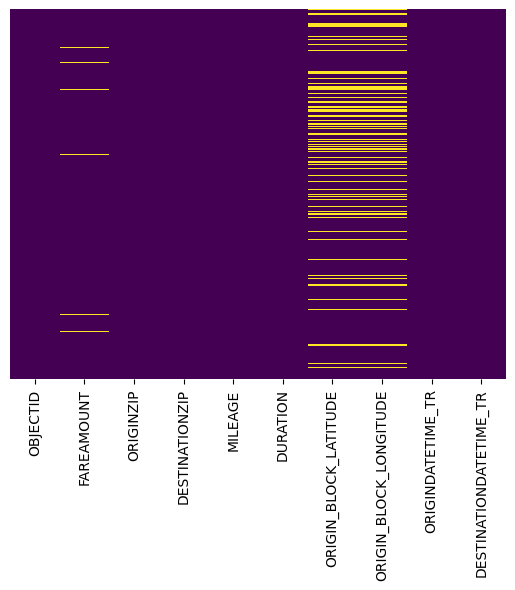

In [ ]:
# find missing values and visualize as heatmap
sns.heatmap(taxi_trips.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print((taxi_trips.isnull().sum()/len(taxi_trips.index))*100)

In [ ]:
# drop records with NA values
# taxi_trips.dropna(subset=['FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE'], inplace=True)

In [13]:
# check for earliest trip
earliest = (
    taxi_trips
    .sort_values(by='ORIGINDATETIME_TR')
    .head(1)
)

print(earliest)

# check for most recent trip
latest = (
    taxi_trips
    .sort_values(by='ORIGINDATETIME_TR', ascending= False) 
    .head(1)
)

print(latest)

        OBJECTID  FAREAMOUNT ORIGINZIP DESTINATIONZIP  MILEAGE  DURATION  \
124795  48413189       11.89     20009          22209      3.7       660   

        ORIGIN_BLOCK_LATITUDE  ORIGIN_BLOCK_LONGITUDE ORIGINDATETIME_TR  \
124795              38.913345              -77.045589  01/01/2019 00:00   

       DESTINATIONDATETIME_TR  
124795       01/01/2019 00:00  
        OBJECTID  FAREAMOUNT ORIGINZIP DESTINATIONZIP  MILEAGE  DURATION  \
574399    574400        9.19     20007          20036     1.48       734   

        ORIGIN_BLOCK_LATITUDE  ORIGIN_BLOCK_LONGITUDE ORIGINDATETIME_TR  \
574399              38.902592              -77.061945  12/31/2019 23:00   

       DESTINATIONDATETIME_TR  
574399       12/31/2019 23:00  


In [9]:
# convert to datetime column and add month column
taxi_trips['pickup_dt'] = pd.to_datetime(taxi_trips['ORIGINDATETIME_TR']) 
taxi_trips['month'] = pd.DatetimeIndex(taxi_trips['pickup_dt']).month 

taxi_trips.dtypes

OBJECTID                           int64
FAREAMOUNT                       float64
ORIGINZIP                         object
DESTINATIONZIP                    object
MILEAGE                          float64
DURATION                           int64
ORIGIN_BLOCK_LATITUDE            float64
ORIGIN_BLOCK_LONGITUDE           float64
ORIGINDATETIME_TR                 object
DESTINATIONDATETIME_TR            object
pickup_dt                 datetime64[ns]
month                              int32
dtype: object

In [14]:
# group by month

trips_monthly = (
    taxi_trips
    .groupby('month')[['OBJECTID']]
    .count()
    .rename(columns={'OBJECTID': 'count'})
    .reset_index()
)

trips_monthly.head(12)

,month,count
0,1,589475
1,2,667546
2,3,902382
3,4,853950
4,5,865374
5,6,800030
6,7,699064
7,8,581921
8,9,700043
9,10,794546
